In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import seaborn as sns


In [3]:
data=pd.read_csv('StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [6]:
data.describe()

,math score,reading score,writing score
count,990.000000,988.000000,994.000000
mean,66.074747,69.228745,68.026157
std,15.191280,14.567952,15.188554
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [8]:
data.shape

(1000, 8)

In [9]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  12
writing score                   6
dtype: int64

In [11]:
x=data['math score'].mean()

In [12]:
data=data.fillna(x)

In [13]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [14]:
data[['math score']].describe()

,math score
count,1000.000000
mean,66.074747
std,15.115057
min,0.000000
25%,57.000000
50%,66.000000
75%,77.000000
max,100.000000


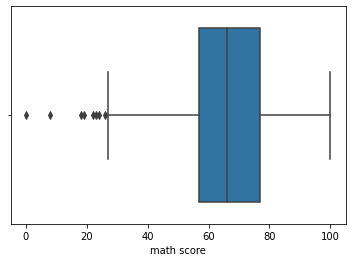

In [15]:
sns.boxplot(x=data['math score'])
plt.show()

In [16]:
data['math score'].quantile(0.25)

57.0

In [17]:
data['math score'].quantile(0.75)

77.0

In [18]:
Q1=data['math score'].quantile(0.25)
Q3=data['math score'].quantile(0.75)
IQR=Q3-Q1

In [19]:
IQR

20.0

In [20]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR

In [21]:
lower_lim

27.0

In [22]:
upper_lim

107.0

In [23]:
outliers_15_low=(data['math score']<lower_lim)

In [1]:
outliers_15_low

NameError: name 'outliers_15_low' is not defined

In [24]:
outliers_15_up=(data['math score']>upper_lim)

In [26]:
len(data['math score'])-(len(data['math score'][outliers_15_low])+len(data['math score'][outliers_15_up]))

992

In [27]:
data['math score'][(outliers_15_up | outliers_15_low)]

17     18.0
59      0.0
145    22.0
338    24.0
466    26.0
787    19.0
842    23.0
980     8.0
Name: math score, dtype: float64

In [28]:
data['math score'][~(outliers_15_up | outliers_15_low)]

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 992, dtype: float64

In [29]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [30]:
data=data[~(outliers_15_up | outliers_15_low)]

In [31]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


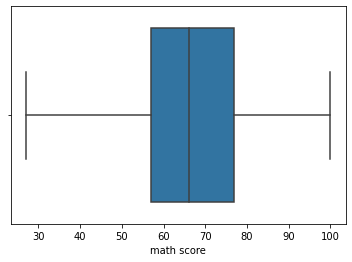

In [32]:
sns.boxplot(x=data['math score'])
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


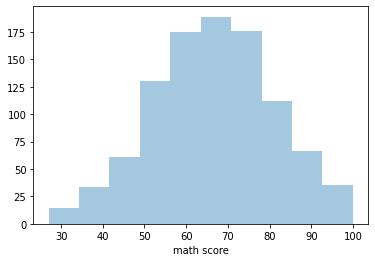

In [33]:
sns.distplot(data['math score'], bins=10, kde=False)
plt.show()

In [34]:
import numpy as np

In [35]:

import scipy.stats as stats

In [36]:
data_min_max_scaled=data.copy()
data_min_max_scaled['math score'] = (data_min_max_scaled['math score'] - data_min_max_scaled['math score'].min()) / (data_min_max_scaled['math score'].max() - data_min_max_scaled['math score'].min())    

In [37]:
data_min_max_scaled

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.616438,72.0,74.0
1,female,group C,some college,standard,completed,0.575342,90.0,88.0
2,female,group B,master's degree,standard,none,0.863014,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,0.273973,57.0,44.0
4,male,group C,some college,standard,none,0.671233,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,99.0,95.0
996,male,group C,high school,free/reduced,none,0.479452,55.0,55.0
997,female,group C,high school,free/reduced,completed,0.438356,71.0,65.0
998,female,group D,some college,standard,completed,0.561644,78.0,77.0


<AxesSubplot:>

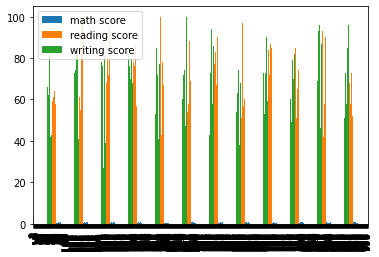

In [38]:
data_min_max_scaled.plot(kind = 'bar')